# Example of GRSl2bgen processing

In [1]:


import os
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import xarray as xr
import rioxarray as rio
import pandas as pd

import cartopy.crs as ccrs

import GRSl2bgen


print(f'-GRSl2bgen: {GRSl2bgen.__version__}')

-GRSl2bgen: 0.0.1


In [2]:
l2a_path = '/data/satellite/Sentinel-2/L2A/31TFJ/2021/05/12/S2A_MSIL2Agrs_20210512T104021_N0500_R008_T31TFJ_20230329T181906'
    
prod = GRSl2bgen.Product(l2a_path)

In [3]:
prod.raster

<xarray.Dataset>
Dimensions:             (wl: 11, y: 5490, x: 5490)
Coordinates:
  * wl                  (wl) int64 443 490 560 665 705 740 783 842 865 1610 2190
    time                datetime64[ns] ...
    band                int64 ...
  * x                   (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y                   (y) float64 4.9e+06 4.9e+06 ... 4.79e+06 4.79e+06
    central_wavelength  (wl) float32 dask.array<chunksize=(11,), meta=np.ndarray>
    spatial_ref         int64 ...
Data variables:
    Rrs                 (wl, y, x) float32 dask.array<chunksize=(11, 5490, 5490), meta=np.ndarray>
    BRDFg               (y, x) float32 dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    aot550              (y, x) float32 dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    mask                (y, x) uint8 dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    vza                 (y, x) float32 dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    sza                 (y, x) float32 dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    raa                 (y, x) float32 dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    flags               (y, x) int64 dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    dem                 (y, x) float32 dask.array<chunksize=(5490, 5490), meta=np.ndarray>
Attributes: (12/72)
    long_name:                           CA BLUE GREEN RED VRE_1 VRE_2 VRE_3 ...
    constellation:                       Sentinel-2
    constellation_id:                    S2
    product_path:                        /data/satellite/Sentinel-2/L1C/31TFJ...
    product_name:                        S2A_MSIL1C_20210512T104021_N0500_R00...
    product_filename:                    S2A_MSIL1C_20210512T104021_N0500_R00...
    ...                                  ...
    vis_swir_index_threshold:            0.0
    hcld_threshold:                      0.003
    dirdata:                             /data/grs/grsdata
    abs_gas_file:                        /home/harmel/Dropbox/Dropbox/work/gi...
    water_vapor_transmittance_file:      /home/harmel/Dropbox/Dropbox/work/gi...
    metadata_profile:                    datacube

In [4]:
OWT = GRSl2bgen.OWT(prod.raster)

(<Figure size 900x600 with 1 Axes>,
 <AxesSubplot: xlabel='$Wavelength\\ (nm)$', ylabel='$Standardized\\ R_{rs}\\ (nm^{-1})$'>)

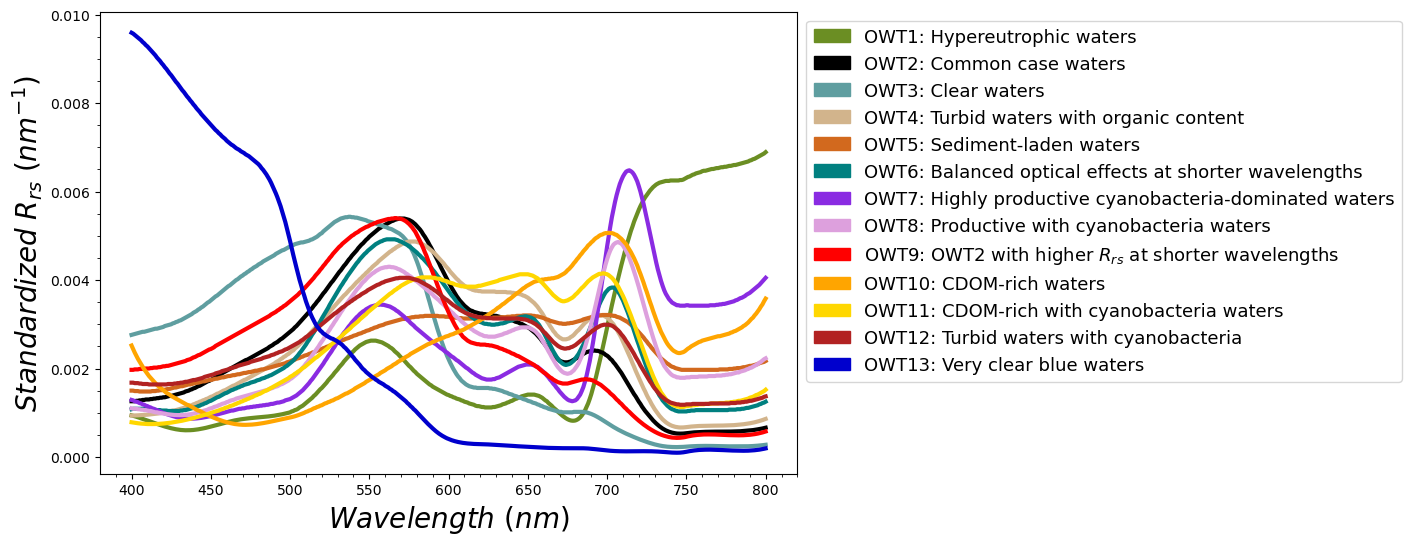

In [5]:
OWT.plot()

In [6]:
xowt = OWT.multi_process()

INFO:root:OWT classification
INFO:root:success
INFO:root:construct xarray owt product


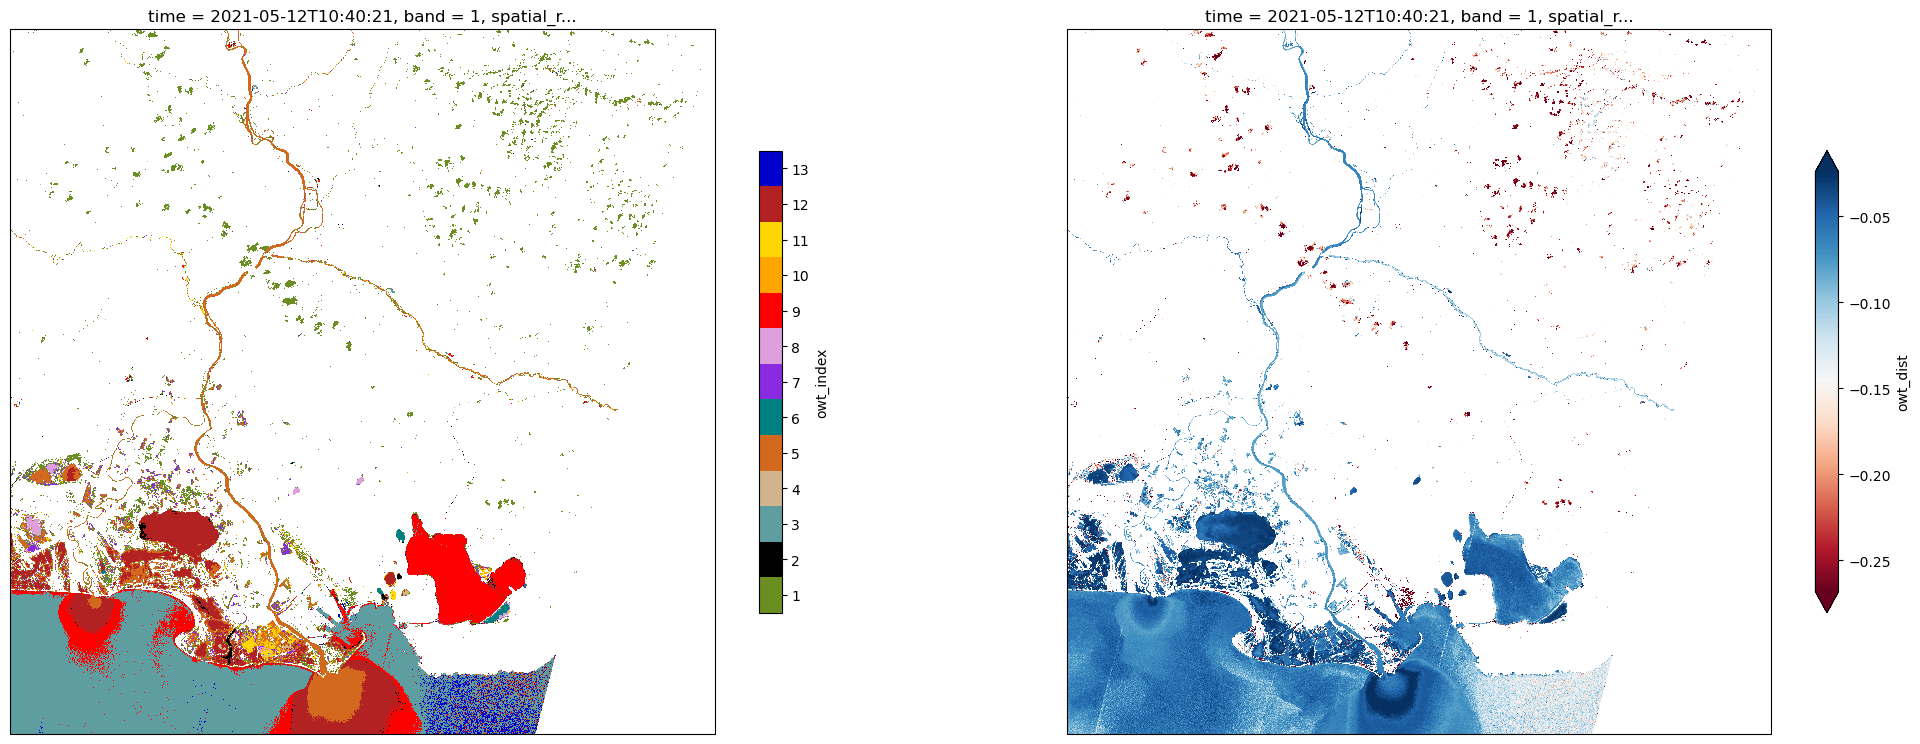

In [7]:
str_epsg = str(prod.raster.rio.crs)
zone = str_epsg[-2:]
is_south = str_epsg[2] == 7
proj = ccrs.UTM(zone, is_south)

fig = plt.figure(figsize=(25, 15))

cmap = plt.get_cmap('tab20c',13)
ax = plt.subplot(1, 2, 1, projection=proj)
OWT.xowt.owt_index.plot.imshow(vmin=0.5,vmax=13.5,cmap=OWT.cmap_owt,cbar_kwargs={ 'ticks':range(1,14),'shrink': 0.4},ax=ax)

cmap = plt.get_cmap('RdBu')#,13)
ax = plt.subplot(1, 2, 2, projection=proj)
OWT.xowt.owt_dist.plot.imshow(robust=True,cmap=cmap,ax=ax, cbar_kwargs={ 'shrink': 0.4})

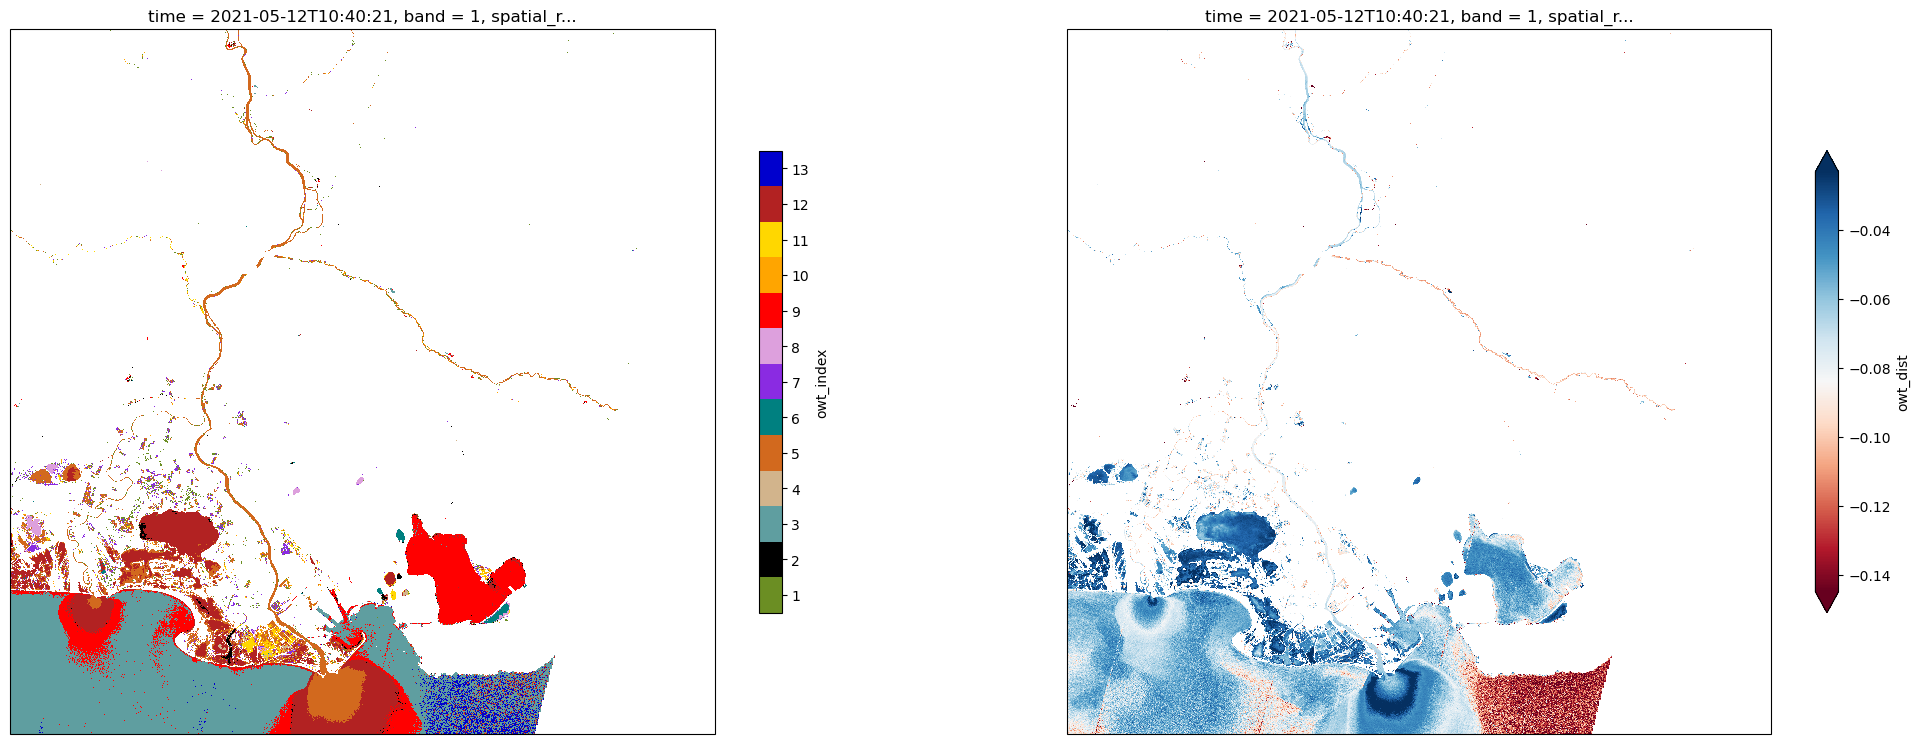

In [8]:
str_epsg = str(prod.raster.rio.crs)
zone = str_epsg[-2:]
is_south = str_epsg[2] == 7
proj = ccrs.UTM(zone, is_south)

fig = plt.figure(figsize=(25, 15))

cmap = plt.get_cmap('tab20c',13)
ax = plt.subplot(1, 2, 1, projection=proj)
OWT.xowt.where(prod.raster.mask==0).owt_index.plot.imshow(vmin=0.5,vmax=13.5,cmap=OWT.cmap_owt,cbar_kwargs={ 'ticks':range(1,14),'shrink': 0.4},ax=ax)

cmap = plt.get_cmap('RdBu')#,13)
ax = plt.subplot(1, 2, 2, projection=proj)
OWT.xowt.where(prod.raster.mask==0).owt_dist.plot.imshow(robust=True,cmap=cmap,ax=ax, cbar_kwargs={ 'shrink': 0.4})

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
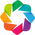

In [13]:
import grstbx

In [19]:
v = grstbx.visual.view_spectral(prod.raster.Rrs.where(prod.raster.mask==0),reproject=True)


In [20]:
v.visu()

Column
    [0] WidgetBox
        [0] Markdown(str)
        [1] Column
            [0] Row
                [0] Markdown(str)
                [1] RadioButtonGroup(options=[0, 1, 2, 3, 4, ...], value=2)
            [1] Row
                [0] Row
                    [0] Markdown(str)
                    [1] DatePicker(enabled_dates=[datetime.date(2021, ...], start=datetime.date(2021, ..., value=datetime.date(2021, ...)
                [1] Row
                    [0] Markdown(str)
                    [1] Select(options=['CartoDark', ...], value='CartoDark')
            [2] Row
                [0] Row
                    [0] Markdown(str)
                    [1] EditableRangeSlider(end=0.06, name='Range Slider', step=0.0001, value=(0, 0.02), width=300)
                [1] Row
                    [0] Markdown(str)
                    [1] FloatSlider(name='Opacity', step=0.05, value=0.95)
                [2] Row
                    [0] Markdown(str)
                    [1] Select(options=['CET_D13', 'bky', ...], value='CET_D13')
        [2] HoloViews(DynamicMap, height=800, sizing_mode='fixed', width=1200)

In [17]:
v = grstbx.visual.view_param(OWT.xowt.where(prod.raster.mask==0),reproject=True)

In [18]:
v.visu()

Column
    [0] WidgetBox
        [0] Markdown(str)
        [1] Column
            [0] Row
                [0] Row
                    [0] Markdown(str)
                    [1] Select(options=['owt_dist', 'owt_index'], value='owt_dist')
                [1] Row
                    [0] Markdown(str)
                    [1] DatePicker(enabled_dates=[datetime.date(2021, ...], start=datetime.date(2021, ..., value=datetime.date(2021, ...)
                [2] Row
                    [0] Markdown(str)
                    [1] Select(options=['CartoDark', ...], value='CartoDark')
            [1] Row
                [0] EditableRangeSlider(end=10, name='Range Slider', step=0.0001, value=(0, 4), width=300)
                [1] Row
                    [0] Markdown(str)
                    [1] FloatSlider(name='Opacity', step=0.05, value=0.95)
                [2] Row
                    [0] Markdown(str)
                    [1] Select(options=['CET_D13', 'bky', ...], value='CET_D13')
        [2] HoloViews(DynamicMap, height=800, sizing_mode='fixed', width=1200)

In [13]:
def SAM(R1,R2):
    denum=(R1*R2).sum('wl')
    denom = (R1**2).sum('wl')**0.5 * (R2**2).sum('wl')**0.5
    return np.arccos(denum/denom)

def SCS(R1,R2):
    R1_avg = R1.mean('wl')
    R2_avg = R2.mean('wl')
    R1_std = R1.std('wl')
    R2_std = R2.std('wl')
    Nwl = len(R1.wl)
    return 1/(Nwl) * ((R1-R1_avg) * (R2-R2_avg)).sum('wl') / (R1_std*R2_std)


Rrs_sat = prod.raster.Rrs.sel(wl=slice(350,800))#.dropna('wl')

Rrs_owt = owt.interp(wl=Rrs_sat.wl).astype(np.float32)




In [42]:
chunk=512
Nwl,height,width = Rrs_sat.shape
Nowt = len(owt.owt)
spectral_dist = np.full((height, width,Nowt), np.nan, dtype=np.float32)
owt_index = np.full((height,width), 0, dtype=np.int8)

In [22]:
owt_scs + (1-2*owt_sam/np.pi)/2

<xarray.DataArray (y: 512, x: 512, owt: 13)>
dask.array<add, shape=(512, 512, 13), dtype=float32, chunksize=(512, 512, 13), chunktype=numpy.ndarray>
Coordinates:
    time         datetime64[ns] 2021-05-12T10:40:21
  * x            (x) float64 6e+05 6e+05 6e+05 ... 6.102e+05 6.102e+05 6.102e+05
  * y            (y) float64 4.9e+06 4.9e+06 4.9e+06 ... 4.89e+06 4.89e+06
    band         int64 1
    spatial_ref  int64 0
  * owt          (owt) int64 1 2 3 4 5 6 7 8 9 10 11 12 13

In [24]:
owt_sam.T

<xarray.DataArray (owt: 13, x: 512, y: 512)>
dask.array<transpose, shape=(13, 512, 512), dtype=float32, chunksize=(13, 512, 512), chunktype=numpy.ndarray>
Coordinates:
    time         datetime64[ns] 2021-05-12T10:40:21
  * x            (x) float64 6e+05 6e+05 6e+05 ... 6.102e+05 6.102e+05 6.102e+05
  * y            (y) float64 4.9e+06 4.9e+06 4.9e+06 ... 4.89e+06 4.89e+06
    band         int64 1
    spatial_ref  int64 0
  * owt          (owt) int64 1 2 3 4 5 6 7 8 9 10 11 12 13

In [27]:
owt_scs 

<xarray.DataArray (owt: 13, x: 370, y: 512)>
dask.array<transpose, shape=(13, 370, 512), dtype=float32, chunksize=(13, 370, 512), chunktype=numpy.ndarray>
Coordinates:
    time         datetime64[ns] 2021-05-12T10:40:21
  * x            (x) float64 7.024e+05 7.024e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 4.9e+06 4.9e+06 4.9e+06 ... 4.89e+06 4.89e+06
    band         int64 1
    spatial_ref  int64 0
  * owt          (owt) int64 1 2 3 4 5 6 7 8 9 10 11 12 13

In [30]:
def SAM(R1,R2):
    denum=(R1*R2).sum('wl')
    denom = (R1**2).sum('wl')**0.5 * (R2**2).sum('wl')**0.5
    return np.arccos(denum/denom)
_Rrs = Rrs_sat[:, iy:yc, ix:xc]
SAM(_Rrs,Rrs_owt)

<xarray.DataArray (y: 512, x: 512, owt: 13)>
dask.array<arccos, shape=(512, 512, 13), dtype=float32, chunksize=(512, 512, 13), chunktype=numpy.ndarray>
Coordinates:
    time         datetime64[ns] 2021-05-12T10:40:21
  * x            (x) float64 6e+05 6e+05 6e+05 ... 6.102e+05 6.102e+05 6.102e+05
  * y            (y) float64 4.9e+06 4.9e+06 4.9e+06 ... 4.89e+06 4.89e+06
    band         int64 1
    spatial_ref  int64 0
  * owt          (owt) int64 1 2 3 4 5 6 7 8 9 10 11 12 13

In [53]:
chunk=1024

np.seterr(divide='ignore',invalid='ignore')
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', 'invalid value encountered in divide', RuntimeWarning)
    for iy in range(0, height, chunk):
        yc = min(height, iy + chunk)
        
        for ix in range(0, width, chunk):
            xc = min(width, ix + chunk)
           
            _Rrs = Rrs_sat[:, iy:yc, ix:xc]
            owt_sam = SAM(_Rrs,Rrs_owt)
            owt_scs = SCS(_Rrs,Rrs_owt)
            
            spectral_dist[iy:yc, ix:xc,:] = owt_scs + (1-2*owt_sam/np.pi)/2

In [40]:
xowt = xr.Dataset(dict(owt_spectral_dist=([ "y", "x","owt"], spectral_dist)),
                                 
                             coords=dict(owt=owt.owt,
                                         x=prod.raster.x,
                                         y=prod.raster.y),
                             )

In [125]:
from numba import njit, prange

@njit()
def SAM(Rrs,Rrs_owt,
        Nwl,Ny,Nx,Nowt):
    '''
    def SAM(R1,R2):
    denum=(R1*R2).sum('wl')
    denom = (R1**2).sum('wl')**0.5 * (R2**2).sum('wl')**0.5
    return np.arccos(denum/denom)
    '''
    
    arr_sam = np.full((Nowt, Ny, Nx),np.nan, dtype=np.float32)
    arr_index = np.full((Ny, Nx),np.nan, dtype=np.float32)
    Rrs_owt_mod = np.full((Nowt), 0., dtype=np.float32)
    
    for iowt in range(Nowt):
        for iwl in range(Nwl):
            Rrs_owt_mod[iowt]+= Rrs_owt[iowt,iwl]**2
        Rrs_owt_mod[iowt]=Rrs_owt_mod[iowt]**0.5
        
    for _iy in range(Ny):
        for _ix in range(Nx):
            if np.isnan(Rrs[0,_iy, _ix]):
                continue
            for iowt in range(Nowt):
                denum=0.
                Rrs_mod =0.
                
                for iwl in range(Nwl):
                    denum+=Rrs[iwl, _iy, _ix]*Rrs_owt[iowt,iwl]
                    Rrs_mod += Rrs[iwl, _iy, _ix]**2 
                Rrs_mod=Rrs_mod**0.5    
                arr_sam[iowt, _iy, _ix] = np.arccos(denum/(Rrs_mod*Rrs_owt_mod[iowt]))
            arr_index[ _iy, _ix] = np.argmin(arr_sam[:, _iy, _ix])+1
            
    return arr_sam, arr_index

@njit()
def _getargmin(array, value):
    '''
    Get index of nearest neighbor in an array.

    :param array: array to search in
    :param value: value you want the nearest index
    :return:
    '''
    
    idx = (np.abs(array - value)).argmin()
    return idx

    
@njit()
def SCS(R1,R2):
    R1_avg = R1.mean('wl')
    R2_avg = R2.mean('wl')
    R1_std = R1.std('wl')
    R2_std = R2.std('wl')
    Nwl = len(R1.wl)
    return 1/(Nwl) * ((R1-R1_avg) * (R2-R2_avg)).sum('wl') / (R1_std*R2_std)

In [81]:
_Rrs*Rrs_owt.values

ValueError: operands could not be broadcast together with shapes (7,1024,1024) (13,7) 

In [88]:
_Rrs = Rrs_sat[:, iy:yc, ix:xc]
Nwl, Ny, Nx = _Rrs.shape
owt_sam = SAM(_Rrs.values,Rrs_owt.values,
              Nwl,Ny,Nx,Nowt)

In [111]:
np.nanargmax(tmp,axis=0)

ValueError: All-NaN slice encountered

In [114]:
tmp

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [126]:
chunk=1024
owt_index = np.full((height,width), 0, dtype=np.float32)
owt_dist = np.full((height,width), 0, dtype=np.float32)

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', 'invalid value encountered in divide', RuntimeWarning)
    for iy in range(0, height, chunk):
        yc = min(height, iy + chunk)
        
        for ix in range(0, width, chunk):
            xc = min(width, ix + chunk)
           
            _Rrs = Rrs_sat[:, iy:yc, ix:xc] 
            Nwl, Ny, Nx = _Rrs.shape
            owt_sam,owt_index[iy:yc, ix:xc]  = SAM(_Rrs.values,Rrs_owt.values,
                          Nwl,Ny,Nx,Nowt)
            
            #owt_scs = SCS(_Rrs,Rrs_owt.values)
            
            #tmp = owt_scs + (1-2*owt_sam/np.pi)/2
            
            tmp =-1*owt_sam/np.pi
            tmp_max = np.max(tmp,axis=0)
            owt_dist[iy:yc, ix:xc] = tmp_max
            

In [128]:
xowt = xr.Dataset(dict(owt_dist=([ "y", "x"], owt_dist),
                       owt_index=([ "y", "x"], owt_index),),
                                 
                             coords=dict(
                                         x=prod.raster.x,
                                         y=prod.raster.y),
                             )

In [77]:
(tmp.fillna(-1).argmax('owt')+1).where(tmp_max>-1000).load()

/home/harmel/anaconda3/envs/grstbx/lib/python3.9/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/harmel/anaconda3/envs/grstbx/lib/python3.9/site-packages/dask/core.py:129: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


<xarray.DataArray (y: 370, x: 370)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time         datetime64[ns] 2021-05-12T10:40:21
  * x            (x) float64 7.024e+05 7.024e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 4.798e+06 4.798e+06 4.798e+06 ... 4.79e+06 4.79e+06
    band         int64 1
    spatial_ref  int64 0

AttributeError: 'DataArray' object has no attribute 'nanargmax'

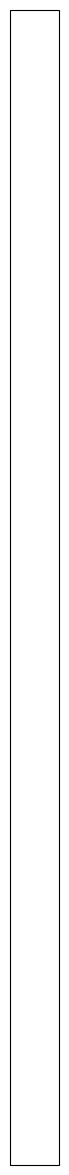

In [56]:
fig = plt.figure(figsize=(25, 15))

cmap = plt.get_cmap('tab20c',13)
ax = plt.subplot(1, 2, 1, projection=proj)
(owt_spectral_dist.owt_spectral_dist.fillna(-1).argmax('owt')+1).plot.imshow(vmin=0.5,vmax=13.5,cmap=cmap_owt,cbar_kwargs={ 'ticks':range(1,14),'shrink': 0.4},ax=ax)

cmap = plt.get_cmap('RdBu')#,13)
ax = plt.subplot(1, 2, 2, projection=proj)
(owt_spectral_dist.owt_spectral_dist.max('owt')).where(Rrs_sat.isel(wl=1)>0).plot.imshow(robust=True,cmap=cmap,ax=ax, cbar_kwargs={ 'shrink': 0.4})

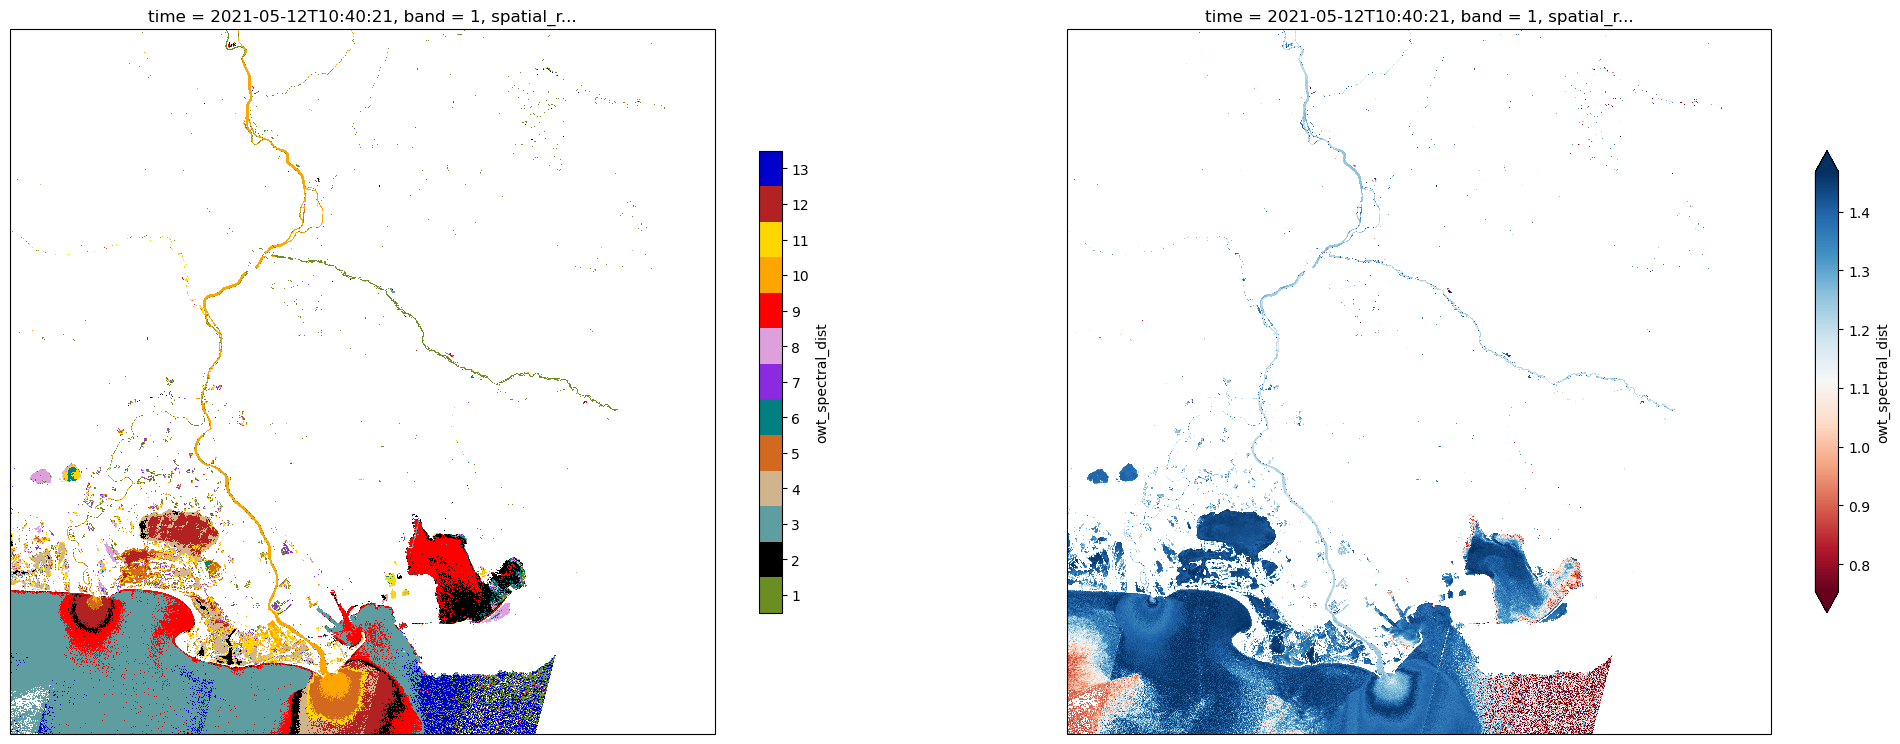

In [47]:
fig = plt.figure(figsize=(25, 15))

cmap = plt.get_cmap('tab20c',13)
ax = plt.subplot(1, 2, 1, projection=proj)
(owt_spectral_dist.owt_spectral_dist.fillna(-1).argmax('owt')+1).where(Rrs_sat.isel(wl=1)>0).plot.imshow(vmin=0.5,vmax=13.5,cmap=cmap_owt,cbar_kwargs={ 'ticks':range(1,14),'shrink': 0.4},ax=ax)

cmap = plt.get_cmap('RdBu')#,13)
ax = plt.subplot(1, 2, 2, projection=proj)
(owt_spectral_dist.owt_spectral_dist.max('owt')).where(Rrs_sat.isel(wl=1)>0).plot.imshow(robust=True,cmap=cmap,ax=ax, cbar_kwargs={ 'shrink': 0.4})

In [ ]:
        Nwl, Ny, Nx = _band_rad.shape
        #if Ny == 0 or Nx == 0:
        #    continue
        arr_tmp = np.full((Nwl, Ny, Nx), np.nan, dtype=np.float32)
        
        # subsetting
        _sza = prod.raster.sza[iy:yc, ix:xc]  # .values
        if monoview:
            _raa = prod.raster.raa[iy:yc, ix:xc]           
            _vza = prod.raster.vza[iy:yc, ix:xc]
            _vza_mean = _vza.values
        else:
            _raa = prod.raster.raa[:, iy:yc, ix:xc]           
            _vza = prod.raster.vza[:, iy:yc, ix:xc]
            _vza_mean = np.mean(_vza, axis=0).values
        
        _azi = (180. - _raa) % 360
        _air_mass_ = acutils.Misc.air_mass(_sza, _vza).values  # air_mass[:, iy:yc,ix:xc] #air_mass(_sza,_vza).values #_p_slope = prod.raster.p_slope[:, iy:yc,ix:xc]
        _p_slope_ = prod.p_slope(_sza, _vza, _raa, sigma2=_sigma2, monoview=monoview).values  # _p_slope[:, iy:yc,ix:xc]
        _aot_ref = aot_ref_raster.values[iy:yc, ix:xc]
        _pressure_ = _pressure[iy:yc, ix:xc] / pressure_ref           
        
        # get LUT values
        _Rdiff = _R_.interp_Rlut(szas, _sza.values,
                                  vzas, _vza.values,
                                  azis, _azi.values,
                                  aot_refs, _aot_ref,
                                  Nwl, Ny, Nx, Rdiff_lut.values)
        _Rray = _R_.interp_Rlut_rayleigh(szas, _sza.values,
                                  vzas, _vza.values,
                                  azis, _azi.values,
                                  Nwl, Ny, Nx, Rray.values)
        #_Rdiff = _Rdiff + (_pressure_ - 1) *  _Rray 
       
        _aot = _R_._interp_aotlut(aot_lut.aot_ref.values, _aot_ref, Nwl, Ny, Nx, aot_lut.values)
        
        #  correction for diffuse light
        Rcorr = _band_rad.values - _Rdiff
        
         # construct wl,y,x raster for Rayleigh optical thickness
        _rot_raster = _R_._multiplicate(_rot, _pressure_, arr_tmp)
       
        # direct transmittance up/down
        Tdir = acutils.Misc.transmittance_dir(_aot, _air_mass_, _rot_raster)

        # vTotal transmittance (for Ed and Lu)
        Tdown = _R_._interp_Tlut(szas, _sza.values, Ttot_Ed_.aot_ref.values, _aot_ref, Nwl, Ny, Nx,
                                         Ttot_Ed_.values)
        Tup = _R_._interp_Tlut(vzas, _vza_mean, Ttot_Ed_.aot_ref.values, _aot_ref, Nwl, Ny, Nx, Ttot_Lu_.values)
        Ttot_du = Tdown * Tup
        
        Rf = np.full((len(iwl_swir), Ny, Nx), np.nan, dtype=np.float32)
        
        for iwl in iwl_swir:
            if monoview:
                Rf[iwl] = Rcorr[iwl] / (Tdir[iwl] * _sunglint_eps[iwl] * _p_slope_)
            else:
                Rf[iwl] = Rcorr[iwl] / (Tdir[iwl] * _sunglint_eps[iwl] * _p_slope_[iwl])
        Rf[Rf<0]=0.
        Rf = np.min(Rf, axis=0)
        Rf_tmp[iy:yc, ix:xc] = Rf
        
        Rf = _R_._multiplicate(_sunglint_eps, Rf, arr_tmp)
        Rf = Tdir * _p_slope_ * Rf
        
        Rrs_tmp[:, iy:yc, ix:xc] = ((Rcorr - Rf) / np.pi)/ Ttot_du
        
print('success')

In [ ]:
fig = plt.figure(figsize=(25, 15))
ax = plt.subplot(1, 2, 1, projection=proj)

cmap = plt.get_cmap('tab20c',13)
(owt_delta.fillna(-1).argmax('owt')+1).where(Rrs_sat.isel(wl=1)>0).plot.imshow(vmin=0.5,vmax=13.5,cmap=cmap_owt,cbar_kwargs={ 'ticks':range(1,14),'shrink': 0.4},ax=ax)
ax = plt.subplot(1, 2, 2, projection=proj)
cmap = plt.get_cmap('RdBu')#,13)
(owt_delta.max('owt')).where(Rrs_sat.isel(wl=1)>0).plot.imshow(robust=True,cmap=cmap,ax=ax, cbar_kwargs={ 'shrink': 0.4})

/home/harmel/anaconda3/envs/grstbx/lib/python3.9/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [32]:
owt_delta#.astype(np.float32)

<xarray.DataArray (y: 5490, x: 5490, owt: 13)>
dask.array<add, shape=(5490, 5490, 13), dtype=float32, chunksize=(5490, 5490, 13), chunktype=numpy.ndarray>
Coordinates:
    time         datetime64[ns] 2021-05-12T10:40:21
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 4.9e+06 4.9e+06 4.9e+06 ... 4.79e+06 4.79e+06
    band         int64 1
    spatial_ref  int64 0
  * owt          (owt) int64 1 2 3 4 5 6 7 8 9 10 11 12 13

dtype('float64')

In [ ]:
        # ----------------------
        # get Chl-a parameters
        # ----------------------
        logging.info('get Chl-a parameters')
        chl_prod= Chl(prod.raster)
        chl_prod.process()

        # ----------------------
        # get SPM parameters
        # ----------------------
        logging.info('get SPM parameters')
        spm_prod= Spm(prod.raster)
        spm_prod.process()

        # ----------------------
        # get CDOM parameters
        # ----------------------
        logging.info('get CDOM parameters')
        cdom_prod= Cdom(prod.raster)
        cdom_prod.process()


        # ----------------------
        # get transparency parameters
        # ----------------------
        logging.info('get transparency parameters')
        trans_prod= Transparency(prod.raster)
        trans_prod.process()

        logging.info('construct l2b product')
        l2_raster_list = [chl_prod.output,spm_prod.output,cdom_prod.output,trans_prod.output]
        l2b = L2bProduct(prod, l2_raster_list)

In [ ]:
noclobber = args['--no_clobber']

##################################
# File naming convention
##################################

outfile = args['-o']

if outfile == None:
    outfile = file
    basename = os.path.basename(file)
    if basename[-3:] != '.nc':
        basename = basename + '.nc'
    basename = basename.replace('L2Agrs', 'L2B')
    odir = args['--odir']
    if odir == './':
        odir = os.getcwd()
else:
    basename = os.path.basename(outfile)
    odir = os.path.dirname(outfile)

if not os.path.exists(odir):
    os.makedirs(odir)

outfile = os.path.join(odir, basename)

if os.path.isfile(outfile) & noclobber:
    print('File ' + outfile + ' already processed; skip!')
    sys.exit()

logging.info('call GRSl2bgen for the following paramater. File:' +
             file + ', output file:' + outfile)
Process().execute(file, outfile)